In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage      
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import datetime
startTime = datetime.datetime.now()
print(str(startTime))

# Junming chen


#Attribute Information:

#Input variables:
# bank client data:
#1 - age (numeric)
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
#8 - contact: contact communication type (categorical: 'cellular','telephone') 
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)

#Output variable (desired target):
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')





2019-04-29 13:23:29.809227


In [2]:
#Import Bank Data Set
banks = pd.read_csv('bank-additional-full.csv', sep=";")
pd.set_option('display.max_colwidth', -1)
#print initial data
banks

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Drop Row with Unknown Values
banks = banks.replace('unknown', np.nan).dropna()
banks = banks.reset_index(drop=True)
banks['education'] = banks['education'].str.replace('.','')

banks.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,highschool,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,highschool,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professionalcourse,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,24,technician,single,professionalcourse,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,25,services,single,highschool,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,25,services,single,highschool,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,29,blue-collar,single,highschool,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,57,housemaid,divorced,basic4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Change Age into Age groups
def agegroup(value):
    if value < 18:
        return 'underage'
    elif 18 <= value <= 35:
        return 'young'
    elif 35 <= value <= 55:
        return 'midage'
    elif value > 55:
        return 'senior'
    return 0


banks['agegroup'] = banks['age'].apply(agegroup)
banks

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agegroup
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,senior
1,37,services,married,highschool,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,midage
2,40,admin.,married,basic6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,midage
3,56,services,married,highschool,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,senior
4,59,admin.,married,professionalcourse,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,senior
5,24,technician,single,professionalcourse,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young
6,25,services,single,highschool,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young
7,25,services,single,highschool,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young
8,29,blue-collar,single,highschool,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,young
9,57,housemaid,divorced,basic4y,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,senior


In [5]:
# Vectorize job column

import sklearn.feature_extraction.text as sk_text


vectorizer = sk_text.TfidfVectorizer()

matrix = vectorizer.fit_transform(banks.job.values)
print(type(matrix))         
tfidf_data = matrix.toarray() 
print(tfidf_data)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
# Vectorize marital cloumn

vectorizer2 = sk_text.TfidfVectorizer()

matrix2 = vectorizer2.fit_transform(banks.marital.values)
print(type(matrix2))         
tfidf_data2 = matrix2.toarray() 
print(tfidf_data2)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [7]:
# Vectorize education 


vectorizer3 = sk_text.TfidfVectorizer()

matrix3 = vectorizer3.fit_transform(banks.education.values)
print(type(matrix3))         
tfidf_data3 = matrix3.toarray() 
print(tfidf_data3)

<class 'scipy.sparse.csr.csr_matrix'>
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
# Vectorize contact


vectorizer4 = sk_text.TfidfVectorizer()

matrix4 = vectorizer4.fit_transform(banks.contact.values)
print(type(matrix4))         
tfidf_data4 = matrix4.toarray() 
print(tfidf_data4)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
# Vectorize Month


vectorizer5 = sk_text.TfidfVectorizer()

matrix5 = vectorizer5.fit_transform(banks.month.values)
print(type(matrix5))         
tfidf_data5 = matrix5.toarray() 
print(tfidf_data5)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [10]:
# Vectorize day_of_week


vectorizer6 = sk_text.TfidfVectorizer()

matrix6 = vectorizer6.fit_transform(banks.day_of_week.values)
print(type(matrix6))         
tfidf_data6 = matrix6.toarray() 
print(tfidf_data6)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [11]:
# Vectorize poutcome


vectorizer7 = sk_text.TfidfVectorizer()

matrix7 = vectorizer7.fit_transform(banks.poutcome.values)
print(type(matrix7))         
tfidf_data7 = matrix7.toarray() 
print(tfidf_data7)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [12]:
# Vectorize agegroup


vectorizer8 = sk_text.TfidfVectorizer()

matrix8 = vectorizer8.fit_transform(banks.agegroup.values)
print(type(matrix8))         
tfidf_data8 = matrix8.toarray() 
print(tfidf_data8)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [13]:
#Append back the Tfidf and features from Vectorizer to DataFrame
count_vect_df = pd.DataFrame(matrix.todense(), columns=vectorizer.get_feature_names())
merge_banks1 = pd.concat([banks, count_vect_df], axis=1)


count_vect_df2 = pd.DataFrame(matrix2.todense(), columns=vectorizer2.get_feature_names())
merge_banks2 = pd.concat([merge_banks1, count_vect_df2], axis=1)


count_vect_df3 = pd.DataFrame(matrix3.todense(), columns=vectorizer3.get_feature_names())
merge_banks3 = pd.concat([merge_banks2, count_vect_df3], axis=1)


count_vect_df4 = pd.DataFrame(matrix4.todense(), columns=vectorizer4.get_feature_names())
merge_banks4 = pd.concat([merge_banks3, count_vect_df4], axis=1)


count_vect_df5 = pd.DataFrame(matrix5.todense(), columns=vectorizer5.get_feature_names())
merge_banks5 = pd.concat([merge_banks4, count_vect_df5], axis=1)


count_vect_df6 = pd.DataFrame(matrix6.todense(), columns=vectorizer6.get_feature_names())
merge_banks6 = pd.concat([merge_banks5, count_vect_df6], axis=1)


count_vect_df7 = pd.DataFrame(matrix7.todense(), columns=vectorizer7.get_feature_names())
merge_banks7 = pd.concat([merge_banks6, count_vect_df7], axis=1)

count_vect_df8 = pd.DataFrame(matrix8.todense(), columns=vectorizer8.get_feature_names())
merge_banks8 = pd.concat([merge_banks7, count_vect_df8], axis=1)


In [14]:
#New DataFrame after ONE Hot Encoding 
merge_banks8

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,thu,tue,wed,failure,nonexistent,success,midage,senior,underage,young
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,services,married,highschool,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,40,admin.,married,basic6y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,56,services,married,highschool,no,no,yes,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,59,admin.,married,professionalcourse,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,24,technician,single,professionalcourse,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,25,services,single,highschool,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,25,services,single,highschool,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,29,blue-collar,single,highschool,no,no,yes,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,57,housemaid,divorced,basic4y,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#Create New DataFrame Dropping inital catagorical columns
banks2 = pd.DataFrame(merge_banks8)

banks2 = banks2.drop(columns=['job','marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome','agegroup', 'duration'])

In [90]:
banks2

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,thu,tue,wed,failure,nonexistent,success,midage,senior,underage,young
0,56,no,no,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,no,yes,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,40,no,no,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,56,no,no,yes,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,59,no,no,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,24,no,yes,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,25,no,yes,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,25,no,yes,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,29,no,no,yes,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,57,no,yes,no,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [91]:
#Data Trimming andf cleaning

change_y_x ={'yes' : 1, 'no' : 0,'unknown': np.nan}
banks2['y'] = banks['y'].map(lambda x: change_y_x[x])
banks2['default'] = banks['default'].map(lambda x: change_y_x[x])
banks2['housing'] = banks['housing'].map(lambda x: change_y_x[x])
banks2['loan'] = banks['loan'].map(lambda x: change_y_x[x])

banks2


,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,thu,tue,wed,failure,nonexistent,success,midage,senior,underage,young
0,56,0,0,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,0,1,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,40,0,0,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,56,0,0,1,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,59,0,0,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,24,0,1,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,25,0,1,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,25,0,1,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,29,0,0,1,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,57,0,1,0,1,999,0,1.1,93.994,-36.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [92]:
# Apped DataFrame to X and Y
X = banks2.drop(columns=['y'])
y = banks2['y']


In [93]:
#split dataset into train and test data

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=None)

In [94]:
#Normalize Data Using MIN MAX SCaler \

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler.fit(X_train)

X_train = min_max_scaler.transform(X_train)

print(X_train)

X_test = min_max_scaler.transform(X_test)

print(X_test)

[[0.21794872 0.         0.         ... 0.         0.         1.        ]
 [0.23076923 0.         1.         ... 0.         0.         1.        ]
 [0.29487179 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.47435897 0.         1.         ... 0.         0.         0.        ]
 [0.42307692 0.         0.         ... 0.         0.         0.        ]
 [0.24358974 0.         1.         ... 0.         0.         0.        ]]
[[0.12820513 0.         1.         ... 0.         0.         1.        ]
 [0.12820513 0.         0.         ... 0.         0.         1.        ]
 [0.25641026 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.55128205 0.         1.         ... 1.         0.         0.        ]
 [0.34615385 0.         0.         ... 0.         0.         0.        ]
 [0.3974359  0.         0.         ... 0.         0.         0.        ]]


C:\Jupyter notebook\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [145]:
#Decision Tree
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion= 'gini' ,max_depth= 5, max_features=55, min_samples_leaf=5)

dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6653
           1       0.66      0.25      0.36       969

   micro avg       0.89      0.89      0.89      7622
   macro avg       0.78      0.61      0.65      7622
weighted avg       0.87      0.89      0.87      7622

[[6530  123]
 [ 729  240]]


In [96]:
#SVM
# train a SVM model on the training set
from sklearn.svm import SVC



clf = SVC(kernel = 'linear', C=10, gamma= 'auto', probability = False, decision_function_shape= 'ovr', random_state = 0)


clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))
print(metrics.classification_report(y_test, y_pred))

[[6551  102]
 [ 787  182]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      6653
           1       0.64      0.19      0.29       969

   micro avg       0.88      0.88      0.88      7622
   macro avg       0.77      0.59      0.61      7622
weighted avg       0.86      0.88      0.85      7622



In [99]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

# set a few optional parameter
lr = LogisticRegression(solver='lbfgs', max_iter=500, multi_class='auto')      
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))
print(metrics.classification_report(y_test, y_pred))



[[6529  124]
 [ 740  229]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6653
           1       0.65      0.24      0.35       969

   micro avg       0.89      0.89      0.89      7622
   macro avg       0.77      0.61      0.64      7622
weighted avg       0.87      0.89      0.86      7622



In [98]:
#Neural Networks
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(60,60,60), solver='sgd', max_iter=500)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

print(metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))
print(metrics.classification_report(y_test, y_pred))


[[6500  153]
 [ 738  231]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6653
           1       0.60      0.24      0.34       969

   micro avg       0.88      0.88      0.88      7622
   macro avg       0.75      0.61      0.64      7622
weighted avg       0.86      0.88      0.86      7622



# KNN Model

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import GridSearchCV

In [119]:
# Create KNN classifier

k_range = list(range(1, 51))

param_grid = dict(n_neighbors=k_range)
print(param_grid)


knn = KNeighborsClassifier(n_neighbors = 1)

grid = GridSearchCV(knn, param_grid, cv=6, scoring='f1_weighted',n_jobs=2)

# Fit the classifier to the data
grid.fit(X, y)



{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [120]:
means = grid.cv_results_['mean_test_score']

for mean, params in zip(means, grid.cv_results_['params']):
    print(mean, params)

0.6154498837819635 {'n_neighbors': 1}
0.7026049946968079 {'n_neighbors': 2}
0.6636645574045853 {'n_neighbors': 3}
0.7075346604740171 {'n_neighbors': 4}
0.6872070177398747 {'n_neighbors': 5}
0.713386258765933 {'n_neighbors': 6}
0.6997812910597115 {'n_neighbors': 7}
0.7197314224557185 {'n_neighbors': 8}
0.7101798638002138 {'n_neighbors': 9}
0.7237959536225942 {'n_neighbors': 10}
0.7163168202594076 {'n_neighbors': 11}
0.7265215075354301 {'n_neighbors': 12}
0.7202346231140561 {'n_neighbors': 13}
0.7294319931344507 {'n_neighbors': 14}
0.7245270788016929 {'n_neighbors': 15}
0.7323047185753525 {'n_neighbors': 16}
0.7283570612653752 {'n_neighbors': 17}
0.7353455254508037 {'n_neighbors': 18}
0.7312089736828439 {'n_neighbors': 19}
0.738178955882971 {'n_neighbors': 20}
0.7345837623994156 {'n_neighbors': 21}
0.7412782952782678 {'n_neighbors': 22}
0.7380872834481651 {'n_neighbors': 23}
0.7433894133984832 {'n_neighbors': 24}
0.740605290463699 {'n_neighbors': 25}
0.7463148084337967 {'n_neighbors': 26

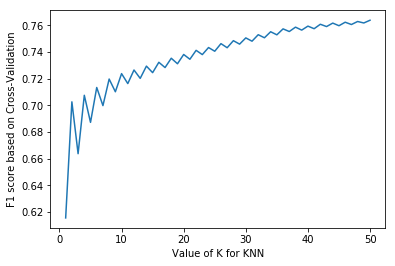

In [121]:
plt.plot(k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score based on Cross-Validation')
plt.show()

In [122]:
# identify the best model

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7638803332397578
{'n_neighbors': 50}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')


In [123]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [124]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion)
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.6361847284177381
[[6500  153]
 [ 738  231]]
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      6653
           1       0.23      0.76      0.35       969

   micro avg       0.64      0.64      0.64      7622
   macro avg       0.59      0.69      0.55      7622
weighted avg       0.86      0.64      0.70      7622



# Graphs, Data Distribution and Feature Ranking

In [374]:
from sklearn.feature_selection import RFE
from sklearn import datasets

import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')

# create the RFE model for the classifier and select number of attributes
rfe = RFE(lr_clf, 3)


rfe = rfe.fit(X, y)

# print summaries for the selection of attributes
print(rfe.support_)   

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False  True False False False False]


In [375]:
print(rfe.ranking_)  

[49 58 28 38 47 30 57 13 32 31 33  2 45 34 16  5 52 23 56 46 18 53 15  7
 41 43 48 40 42 20 51 21 27 50 26 44 11 22  4 10 54 37 36  1  1  6 12 29
 17  8 24 25 35  3 14  1 19  9 55 39]


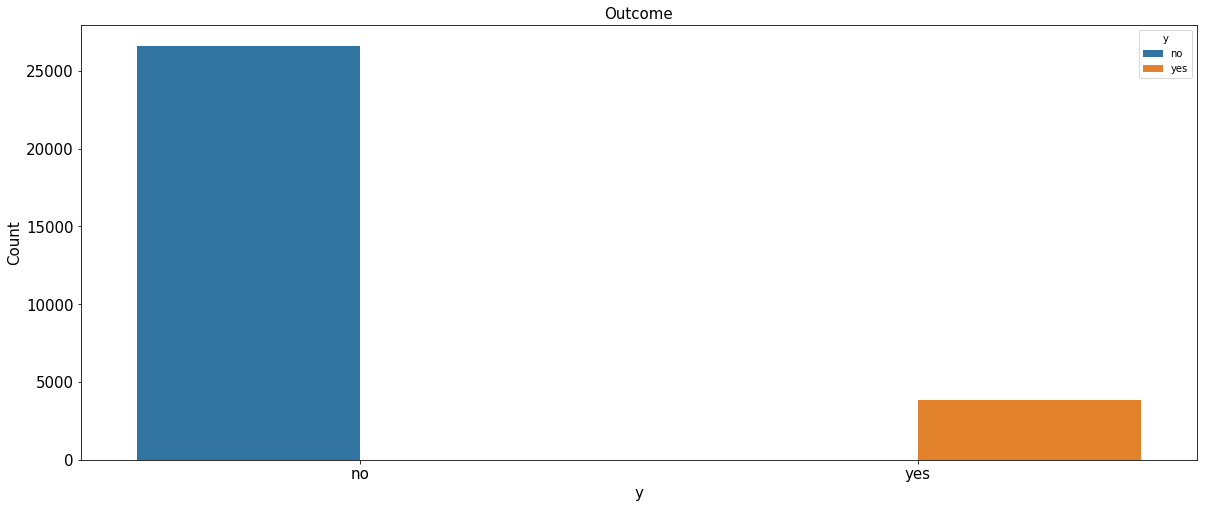

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='y',hue='y',data=banks2)
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Outcome', fontsize=15)
ax.tick_params(labelsize=15)

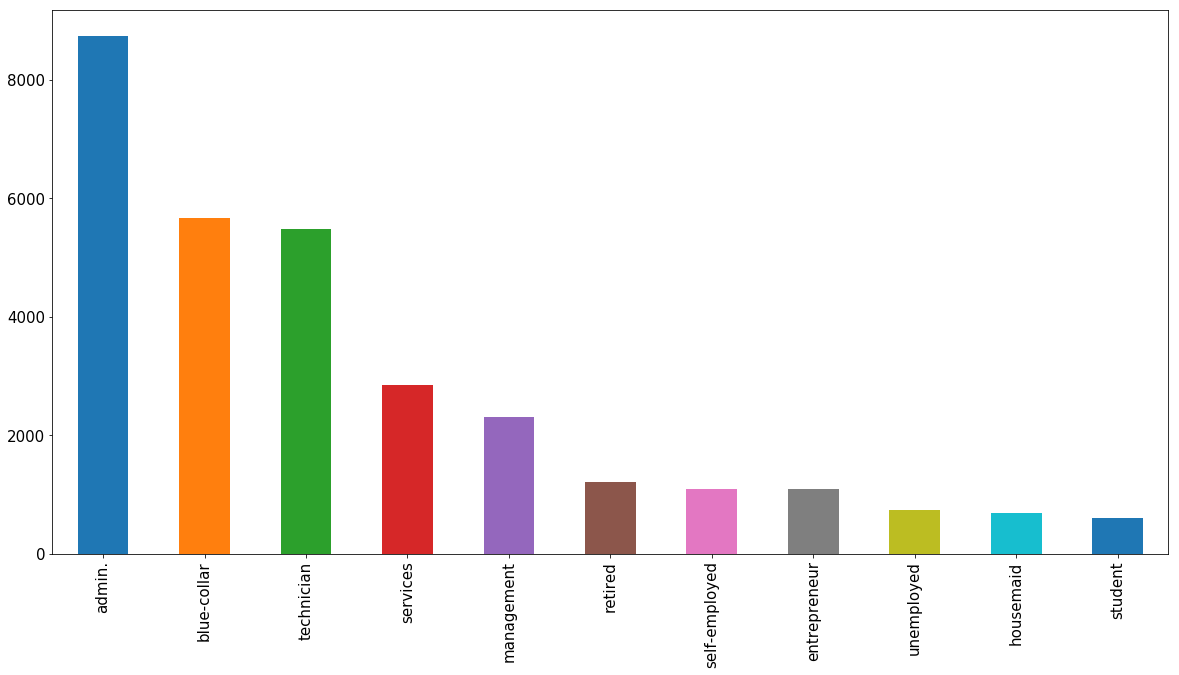

In [18]:

banks.job.value_counts()[0:50].plot(kind='bar', figsize=(20, 10),fontsize=15)

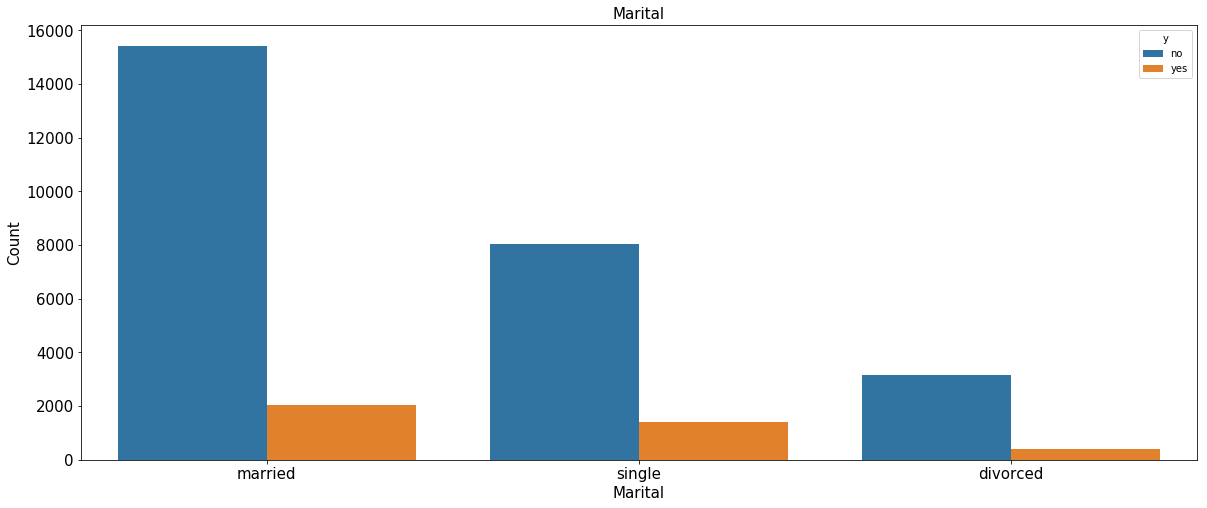

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='marital',hue='y',data=banks)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital', fontsize=15)
ax.tick_params(labelsize=15)

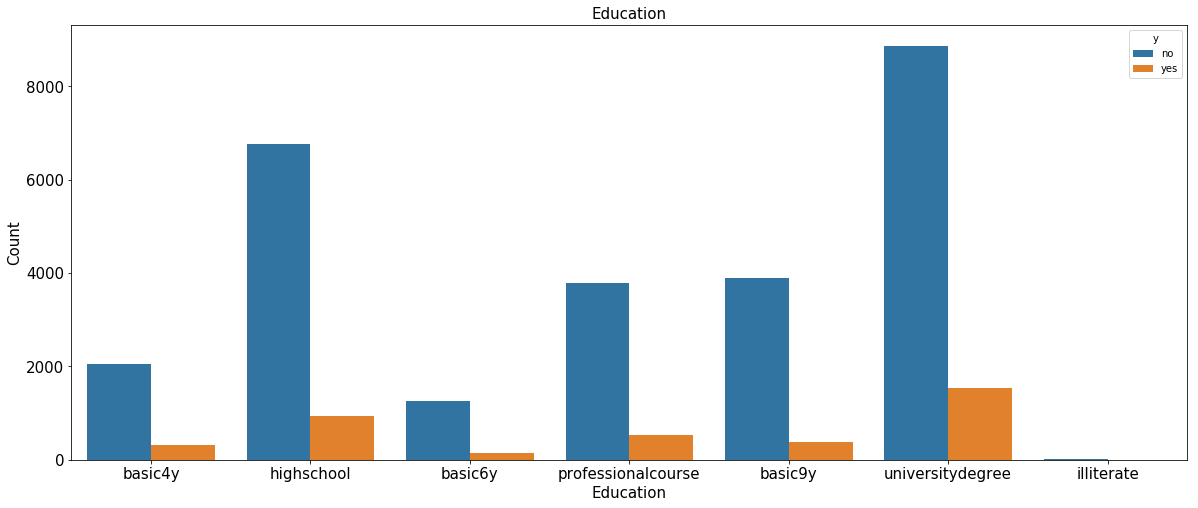

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education',hue='y', data = banks)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education', fontsize=15)
ax.tick_params(labelsize=15)

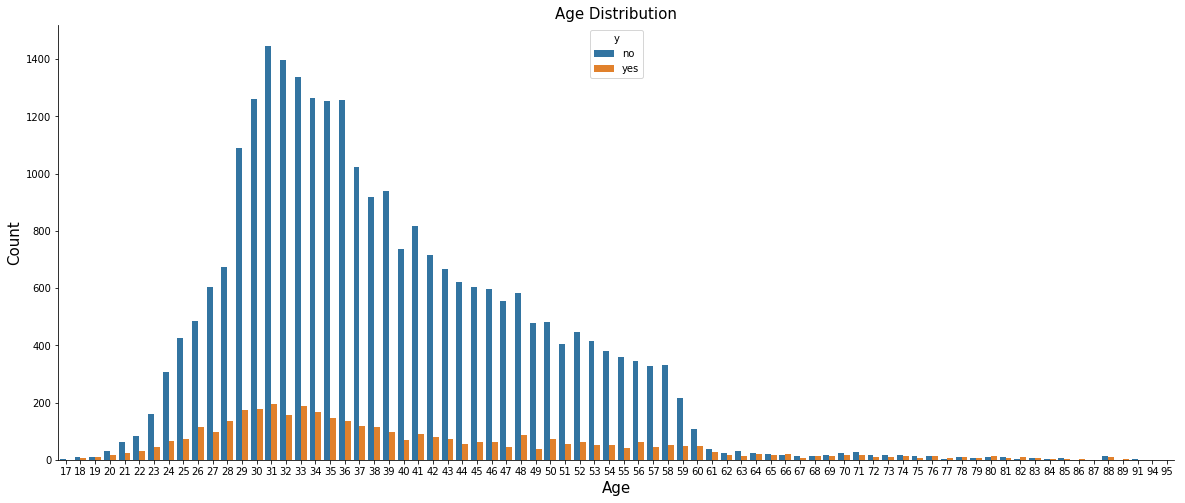

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age',hue='y', data = banks)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Distribution', fontsize=15)
sns.despine()

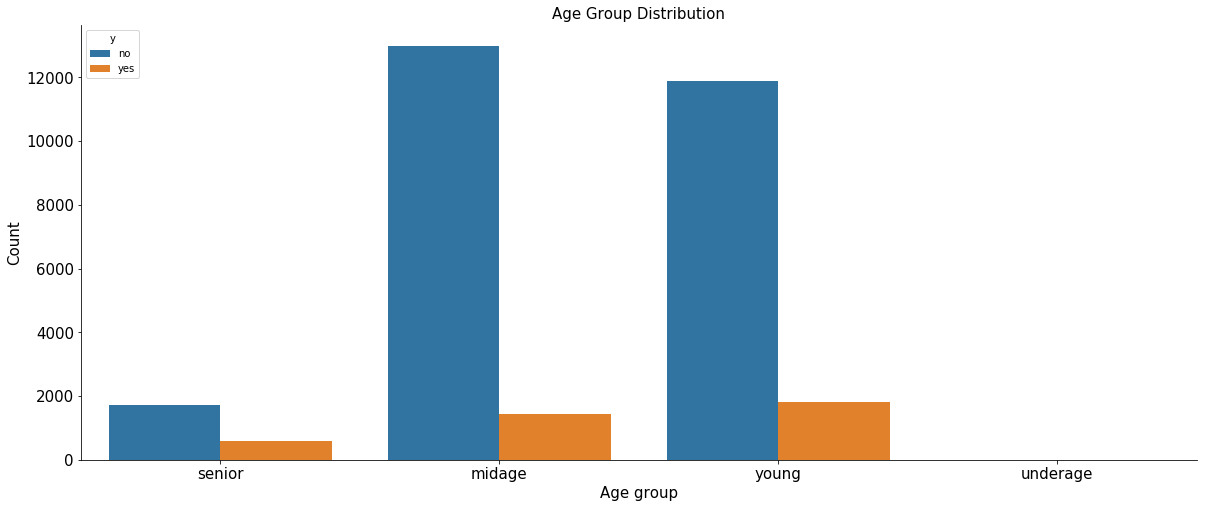

In [380]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'agegroup',hue='y', data = banks)
ax.set_xlabel('Age group', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Group Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

# Feature Importance

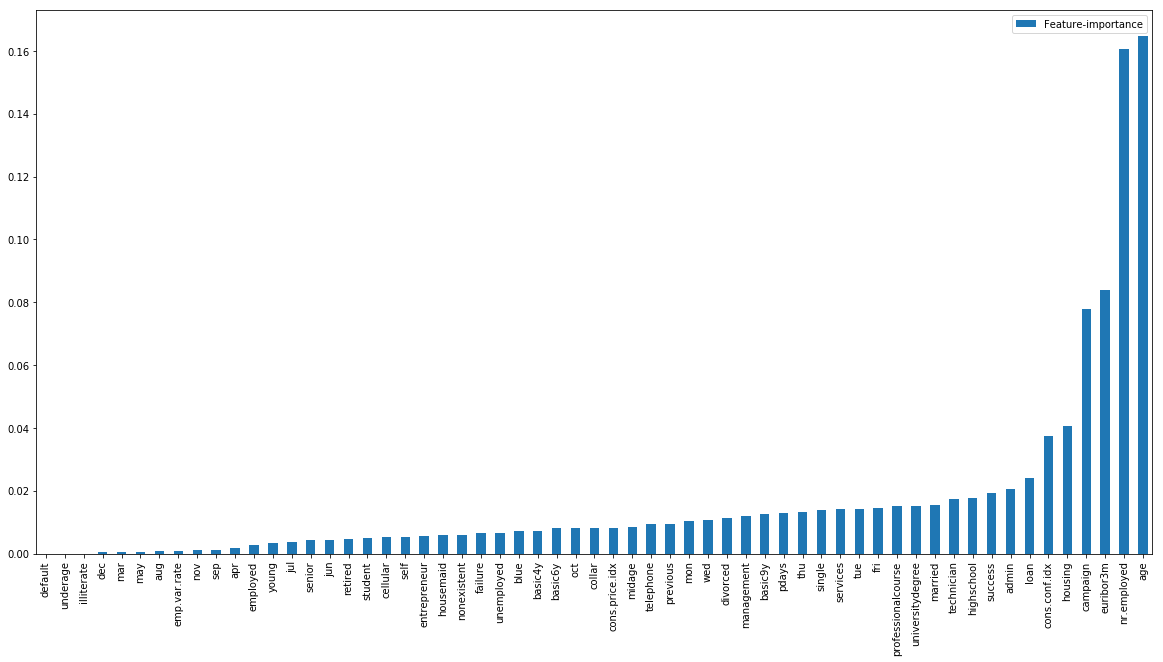

In [112]:


feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, dtree.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance').plot(kind='bar', rot=90,figsize=(20, 10))

In [311]:
X.columns

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'agegroup', 'admin', 'blue', 'collar',
       'employed', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self', 'services', 'student', 'technician', 'unemployed', 'divorced',
       'married', 'single', 'basic4y', 'basic6y', 'basic9y', 'highschool',
       'illiterate', 'professionalcourse', 'universitydegree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success', 'midage', 'senior', 'underage', 'young'],
      dtype='object')

In [143]:
#Parameter Tuning - To find the best parameter for Decision Tree


# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1, None],
              "max_features": randint(1, 50),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 1, 'max_features': 24, 'min_samples_leaf': 6}
Best score is 0.8349186565205983
